# Espaço de fases do Pêndulo Simples
## Introdução
O pêndulo simples consiste em um fio finito, fixo em uma das extremidades, com uma massa anexada na outra. A imagem a baixo o ilustra:

![Pendulo Simples](https://i.imgur.com/qs6273Z.png)

Figura: Pêndulo simples $^{[1]}$

Podemos descrever seu movimento da seguinte forma;

Partimos da equação do pêndulo:
$$
\begin{equation}
\frac{d^{2}x}{\text{d}t^2} = -g * sen(\theta)
\tag{1}
\end{equation}
$$

Considerando que $x = l * \theta $, 
$$
\begin{equation}
\frac{d^{2}x}{\text{d}t^2} = l * \frac{d^{2}\theta}{\text{d}t^2}
\tag{2}
\end{equation}
$$

chamando $\omega = \sqrt{\frac{g}{l}}$, chegamos a:

$$
\begin{equation}
\frac{d^{2}\theta}{\text{d}t^2} = - \omega^2 * sin(\theta)
\tag{3}
\end{equation}
$$

Sua solução analítica só é possível por meio de uma aproximação de pequenos ângulos, então é necessário uma aproximação numérica para solucionarmos problemas com angulos maiores.

## Método de Euler
Partindo da derivada (3), podemos definir:

$$
\begin{equation}
\frac{d^2\theta}{\text{d}t^2} = v
\tag{4}
\end{equation}
$$

$$
\begin{equation}
\frac{dv}{\text{d}t} = - \omega^2 * sin(\theta)
\tag{5}
\end{equation}
$$

Chegamos, assim, em nosso sistema para fazer as iterações:
$$
\begin{equation}
\theta_n = \theta_{n-1} + V_{n-1} * \Delta{t}
\tag{6}
\end{equation}
$$
$$V_n = V_{n-1} - \omega^2 * sen(\theta_{n-1}) * \Delta t$$

Definindo nossos parâmetros:

$g = 10 \frac{m}{s^2}$

$l = 10m$

$m=1$Kg

Iremos iterar no intervalo de tempo $t_0 = 0s$; $t_f = 30s$, primeiramente para verificar o espaço de fases, e posteriormente para a energia - variando os valores de $\Delta t$ - os seguintes pares de condições inicial:

1. $\theta_0 = 1$; $v_0 = 0$
2. $\theta_0 = 1.5$; $v_0 = 0$
3. $\theta_0 = 3.14$; $v_0 = 0$
4. $\theta_0 = -9.42$; $v_0 = 0.1$
5. $\theta_0 = 9.42$; $v_0 = -0.1$


## Programa para os espaçoes de fases:

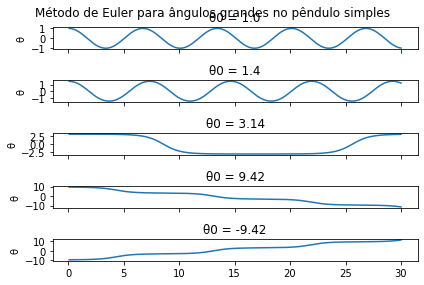

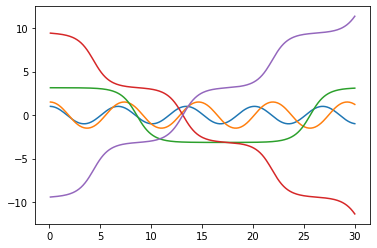

In [ ]:
##
# MÉTODO DE EULER PARA ÂNGULOS GRANDES NO PÊNDULO SIMPLES
##

import numpy as np
from matplotlib import pyplot as plt


t0 = 0
v0 = 0
dt = 0.1
w = 1
g = 10
l = 10
tf = 30

x0 = [1, 1.5, 3.14, -9.42, 9.42]

x1, x1_5, x3_14, x9, x_9 = [], [], [], [], []

v0_1, v0_01 = [], []

xan_list = []
t_list = []

for xinit in x0:
    v = v0
    x = xinit
    t = t0

    if x == -9.42:
        v = 0.1
    if x == 9.42:
        v = -0.1

    while(t < tf):
        t = t + dt
        x = x + v * dt
        v = v - np.sin(x) * dt
        if (xinit == 1):
            x1.append(x)
            t_list.append(t)
        elif (xinit == 1.5):
            x1_5.append(x)
        elif (xinit == 3.14):
            x3_14.append(x)
        elif (xinit == 9.42):
            x9.append(x)
        elif (xinit == -9.42):
            x_9.append(x)

fig, axs = plt.subplots(5, sharex=True)
fig.suptitle('Método de Euler para ângulos grandes no pêndulo simples')

axs[0].plot(t_list, x1)
axs[0].set_title("θ0 = 1.0")

axs[1].plot(t_list, x1_5)
axs[1].set_title("θ0 = 1.4")

axs[2].plot(t_list, x3_14)
axs[2].set_title("θ0 = 3.14")

axs[3].plot(t_list, x9)
axs[3].set_title("θ0 = 9.42")

axs[4].plot(t_list, x_9)
axs[4].set_title("θ0 = -9.42")

for ax in axs.flat:
    ax.set(xlabel='', ylabel='θ')


fig.tight_layout()

plt.show()

plt.plot(t_list, x1)
plt.plot(t_list, x1_5)
plt.plot(t_list, x3_14)
plt.plot(t_list, x9)
plt.plot(t_list, x_9)

plt.show()


### Para melhor visualisação dos gráficos:

![θxt](https://i.imgur.com/OyljPt7.png)
![θxt](https://i.imgur.com/G7N1r9G.png)

## Perioticidade do movimento

Observa-se pelos gráficos que com um $\theta_0$ menor (no caso = 1.4), o período de oscilação foi de aproximadamente 7.5s, já com um $\theta_0$ maior (de 3.14), essa perioticidade foi de aproximadamente 30s. Com ângulos não-pequenos, quanto maior o ângulo inicial, maior seu período de oscilação, tendendo ao infinito a partir de um angulo maior que de $\pi$.

É possível observar a perioticidade do movimento ao "plotarmos" a relação de $\theta$ com $v$:

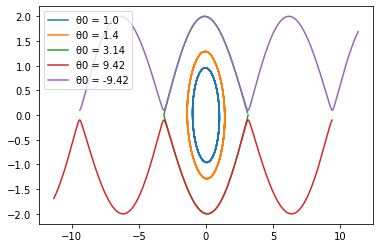

In [ ]:
##
## MÉTODO DE EULER PARA ÂNGULOS GRANDES NO PÊNDULO SIMPLES (relação de θxv)
##

import numpy as np
from matplotlib import pyplot as plt


t0 = 0
v0 = 0
dt = 0.1
w = 1
g = 10
l = 10
tf = 30


x0 = [1, 1.4, 3.14, -9.42, 9.42]

x1, x1_4, x3_14, x9, x_9 = [], [], [], [], []
v1, v1_4, v3_14, v9, v_9 = [], [], [], [], []


v0_1, v0_01 = [], []

xan_list = []
t_list = []

for xinit in x0:
    v = v0
    x = xinit
    t = t0

    if x == -9.42:
        v = 0.1
    if x == 9.42:
        v = -0.1

    while(t < tf):
        t = t + dt

        if xinit != 1.5:
            x = x + v * dt
            v = v - np.sin(x) * dt

            if (xinit == 1):
                x1.append(x)
                v1.append(v)
                t_list.append(t)
            elif (xinit == 1.4):
                x1_4.append(x)
                v1_4.append(v)
            elif (xinit == 3.14):
                x3_14.append(x)
                v3_14.append(v)
            elif (xinit == 9.42):
                x9.append(x)
                v9.append(v)
            elif (xinit == -9.42):
                x_9.append(x)
                v_9.append(v)


plt.plot(x1, v1)

plt.plot(x1_4, v1_4)

plt.plot(x3_14, v3_14)

plt.plot(x9, v9)

plt.plot(x_9, v_9)

plt.legend(["θ0 = 1.0", "θ0 = 1.4", "θ0 = 3.14", "θ0 = 9.42", "θ0 = -9.42"])
plt.show()


### Para melhor visualização:
![θxv](https://i.imgur.com/xkHXp0Y.png)


# Energia
Para a energia, os programas para cada $\Delta t$, assim como o comparativo entre os dois, estão a baixo:

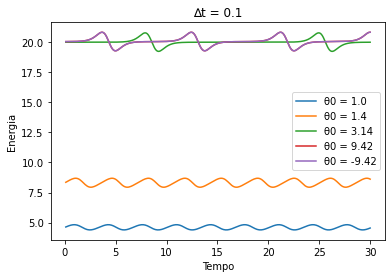

In [ ]:
##
#* Δt = 0.1
##

import numpy as np
from matplotlib import pyplot as plt


t0 = 0
v0 = 0
dt = 0.1
w = 1
g = 10
l = 10
m = 1
tf = 30


x0 = [1, 1.4, 3.14, -9.42, 9.42]

e1, e14, e314, e9, e_9 = [], [], [], [], []

t_list = []


for xinit in x0:
    v = v0
    x = xinit
    t = t0

    if x == -9.42:
        v = 0.1
    if x == 9.42:
        v = -0.1

    while(t < tf):
        t = t + dt

        if xinit != 1.5:
            x = x + v * dt
            v = v - np.sin(x) * dt
            Ec = m*(v*v) * 0.5 * l
            Ep = m * g * (1 - np.cos(x))
            Et = Ec + Ep

            if (xinit == 1):
                e1.append(Et)
                t_list.append(t)
            elif (xinit == 1.4):
                e14.append(Et)
            elif (xinit == 3.14):
                e314.append(Et)
            elif (xinit == 9.42):
                e9.append(Et)
            elif (xinit == -9.42):
                e_9.append(Et)

plt.plot(t_list, e1)
plt.plot(t_list, e14)
plt.plot(t_list, e314)
plt.plot(t_list, e9)
plt.plot(t_list, e_9)

plt.title("∆t = 0.1")
plt.legend(["θ0 = 1.0", "θ0 = 1.4", "θ0 = 3.14", "θ0 = 9.42", "θ0 = -9.42"])
plt.xlabel("Tempo")
plt.ylabel("Energia")
plt.show()


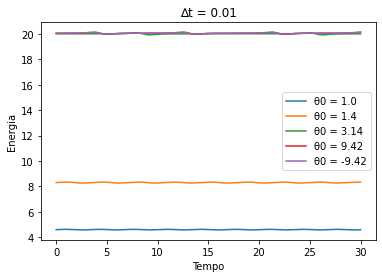

In [ ]:
##
#* Δt = 0.01
##

import numpy as np
from matplotlib import pyplot as plt


t0 = 0
v0 = 0
dt = 0.01
w = 1
g = 10
l = 10
m = 1
tf = 30


x0 = [1, 1.4, 3.14, -9.42, 9.42]

e1, e14, e314, e9, e_9 = [], [], [], [], []

t_list = []


for xinit in x0:
    v = v0
    x = xinit
    t = t0

    if x == -9.42:
        v = 0.1
    if x == 9.42:
        v = -0.1

    while(t < tf):
        t = t + dt

        if xinit != 1.5:
            x = x + v * dt
            v = v - np.sin(x) * dt
            Ec = m*(v*v) * 0.5 * l
            Ep = m * g * (1 - np.cos(x))
            Et = Ec + Ep

            if (xinit == 1):
                e1.append(Et)
                t_list.append(t)
            elif (xinit == 1.4):
                e14.append(Et)
            elif (xinit == 3.14):
                e314.append(Et)
            elif (xinit == 9.42):
                e9.append(Et)
            elif (xinit == -9.42):
                e_9.append(Et)

plt.plot(t_list, e1)
plt.plot(t_list, e14)
plt.plot(t_list, e314)
plt.plot(t_list, e9)
plt.plot(t_list, e_9)

plt.title("∆t = 0.01")
plt.legend(["θ0 = 1.0", "θ0 = 1.4", "θ0 = 3.14", "θ0 = 9.42", "θ0 = -9.42"])
plt.xlabel("Tempo")
plt.ylabel("Energia")
plt.show()


### Para melhor visualização:
![Δt = 0.1](https://i.imgur.com/3NXQQ62.png)
![Δt = 0.1](https://i.imgur.com/QI9Y1Nb.png)


Analisando apenas para $\theta_0 = 3.14$ e para $\theta_0 = 1.4$, para melhor visualizar as diferênças:

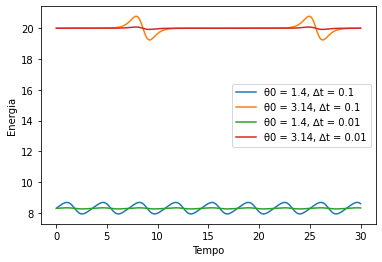

In [ ]:
##
#TODO: O código precisa ser optimizado, usando um list para os dt.
##

import numpy as np
from matplotlib import pyplot as plt


t0 = 0
v0 = 0
dt = 0.1
w = 1
g = 10
l = 10
m = 1
tf = 30


x0 = [1.4, 3.14]

e14, e314 = [], []

t_list = []


for xinit in x0:
    v = v0
    x = xinit
    t = t0

    while(t < tf):
        t = t + dt

        x = x + v * dt
        v = v - np.sin(x) * dt
        Ec = m*(v*v) * 0.5 * l
        Ep = m * g * (1 - np.cos(x))
        Et = Ec + Ep

        if (xinit == 1.4):
            e14.append(Et)
            t_list.append(t)
        elif (xinit == 3.14):
            e314.append(Et)

plt.plot(t_list, e14)
plt.plot(t_list, e314)

x0 = [1.4, 3.14]

e14, e314 = [], []

t_list = []

dt = 0.01

for xinit in x0:
    v = v0
    x = xinit
    t = t0

    while(t < tf):
        t = t + dt

        x = x + v * dt
        v = v - np.sin(x) * dt
        Ec = m*(v*v) * 0.5 * l
        Ep = m * g * (1 - np.cos(x))
        Et = Ec + Ep

        if (xinit == 1.4):
            e14.append(Et)
            t_list.append(t)
        elif (xinit == 3.14):
            e314.append(Et)

plt.plot(t_list, e14)
plt.plot(t_list, e314)

plt.legend(["θ0 = 1.4, ∆t = 0.1 ", "θ0 = 3.14, ∆t = 0.1",
            "θ0 = 1.4, ∆t = 0.01 ", "θ0 = 3.14, ∆t = 0.01"])
plt.xlabel("Tempo")
plt.ylabel("Energia")
plt.show()


### Para melhor visualização:
![comp. de ∆t](https://i.imgur.com/TCjbBgh.png)